In [1]:
import matplotlib.pyplot as plt
import requests
import pandas as pd
import json
import scipy.stats as st
import plotly.express as px


In [2]:
!pip install -U plotly

Requirement already up-to-date: plotly in c:\users\robmir\anaconda3\lib\site-packages (4.14.3)


In [3]:
# covid Data API import
url = "https://api.apify.com/v2/key-value-stores/vpfkeiYLXPIDIea2T/records/LATEST?disableRedirect=true"


In [4]:
response = requests.get(url).json()
print(json.dumps(response, indent=4, sort_keys=True))

{
    "README": "https://apify.com/puorc/mexico-covid19?utm_source=app",
    "State": {
        "Aguascalientes": {
            "deceased": 676,
            "infected": 7753
        },
        "Baja California": {
            "deceased": 3680,
            "infected": 22137
        },
        "Baja California Sur": {
            "deceased": 537,
            "infected": 10925
        },
        "Campeche": {
            "deceased": 840,
            "infected": 6235
        },
        "Chiapas": {
            "deceased": 1323,
            "infected": 8079
        },
        "Chihuahua": {
            "deceased": 1483,
            "infected": 12753
        },
        "Ciudad de Mexico": {
            "deceased": 10730,
            "infected": 138329
        },
        "Coahuila": {
            "deceased": 1996,
            "infected": 28317
        },
        "Colima": {
            "deceased": 579,
            "infected": 5671
        },
        "Durango": {
            "deceased": 689,
 

In [5]:
Covid_data_dic = response['State']
Covid_data_dic

{'Ciudad de Mexico': {'infected': 138329, 'deceased': 10730},
 'Baja California Sur': {'infected': 10925, 'deceased': 537},
 'Tabasco': {'infected': 32868, 'deceased': 2893},
 'Sonora': {'infected': 35177, 'deceased': 2971},
 'Coahuila': {'infected': 28317, 'deceased': 1996},
 'Yucatan': {'infected': 19426, 'deceased': 1635},
 'San Luis Potosi': {'infected': 24279, 'deceased': 1782},
 'Tamaulipas': {'infected': 30066, 'deceased': 2381},
 'Nuevo Leon': {'infected': 43667, 'deceased': 3306},
 'Quintana Roo': {'infected': 12590, 'deceased': 1743},
 'Colima': {'infected': 5671, 'deceased': 579},
 'Guanajuato': {'infected': 43054, 'deceased': 3099},
 'Sinaloa': {'infected': 19791, 'deceased': 3366},
 'Campeche': {'infected': 6235, 'deceased': 840},
 'Baja California': {'infected': 22137, 'deceased': 3680},
 'Tlaxcala': {'infected': 7820, 'deceased': 1133},
 'Guerrero': {'infected': 20295, 'deceased': 2057},
 'Aguascalientes': {'infected': 7753, 'deceased': 676},
 'Durango': {'infected': 984

In [6]:
states = ['Aguascalientes'	,
 'Baja California'	,
 'Baja California Sur'	,
 'Campeche'	,
 'Chiapas'	,
 'Chihuahua'	,
 'Ciudad de Mexico'	,
 'Coahuila'	,
 'Colima'	,
 'Durango'	,
 'Estado de Mexico'	,
 'Guanajuato'	,
 'Guerrero'	,
 'Hidalgo'	,
 'Jalisco'	,
 'Michoacan'	,
 'Morelos'	,
 'Nayarit'	,
 'Nuevo Leon'	,
 'Oaxaca'	,
 'Puebla'	,
 'Queretaro'	,
 'Quintana Roo'	,
 'San Luis Potosi'	,
 'Sinaloa'	,
 'Sonora'	,
 'Tabasco'	,
 'Tamaulipas'	,
 'Tlaxcala'	,
 'Veracruz'	,
 'Yucatan'	,
 'Zacatecas'	]


In [7]:
infected = []

In [8]:
for x in states:
    infected.append(Covid_data_dic[x]['infected'])

In [9]:
infected

[7753,
 22137,
 10925,
 6235,
 8079,
 12753,
 138329,
 28317,
 5671,
 9844,
 88619,
 43054,
 20295,
 13844,
 29252,
 21927,
 6283,
 6247,
 43667,
 18694,
 32922,
 10086,
 12590,
 24279,
 19791,
 35177,
 32868,
 30066,
 7820,
 34679,
 19426,
 8122]

In [10]:
data = {"State": states,"Covid Cases":infected}


covid_df = pd.DataFrame(data,columns=['State',  'Covid Cases'])
covid_df.head()

,State,Covid Cases
0,Aguascalientes,7753
1,Baja California,22137
2,Baja California Sur,10925
3,Campeche,6235
4,Chiapas,8079


In [11]:
covid_df.to_csv("clean_data/covid.csv", index=False)

In [12]:
print(f"COVID19 infected data has been updated succesfully")

COVID19 infected data has been updated succesfully


In [13]:
# Import other dataframes and clean them
# 1. Population per state data
# https://www.inegi.org.mx/app/tabulados/interactivos/?pxq=Poblacion_Poblacion_01_e60cd8cf-927f-4b94-823e-972457a12d4b

In [14]:
inegi = "raw_data/INEGI_Censo_Población_Vivienda_2020.csv"
census = pd.read_csv(inegi)

In [15]:
census.head(15)
#Remove Estados Unidos Mexicanos, keep only 2020 data and stay only with Total data (from age group)

,Entidad federativa,Grupo quinquenal de edad,1990,1995,2000,2005,2010,2020
0,Estados Unidos Mexicanos,Total,81249645,91158290,97483412,103263388,112336538,126014024
1,Estados Unidos Mexicanos,0 a 4 años,10195178,10724100,10635157,10186243,10528322,10047365
2,Estados Unidos Mexicanos,5 a 9 años,10562234,10867563,11215323,10511738,11047537,10764379
3,Estados Unidos Mexicanos,10 a 14 años,10389092,10670048,10736493,10952123,10939937,10943540
4,Estados Unidos Mexicanos,15 a 19 años,9664403,10142071,9992135,10109021,11026112,10806690
5,Estados Unidos Mexicanos,20 a 24 años,7829163,9397424,9071134,8964629,9892271,10422095
6,Estados Unidos Mexicanos,25 a 29 años,6404512,7613090,8157743,8103358,8788177,9993001
7,Estados Unidos Mexicanos,30 a 34 años,5387619,6564605,7136523,7933951,8470798,9420827
8,Estados Unidos Mexicanos,35 a 39 años,4579116,5820178,6352538,7112526,8292987,9020276
9,Estados Unidos Mexicanos,40 a 44 años,3497770,4434317,5194833,6017268,7009226,8503586


In [16]:
census.count()

Entidad federativa          759
Grupo quinquenal de edad    759
1990                        759
1995                        759
2000                        759
2005                        759
2010                        759
2020                        759
dtype: int64

In [17]:
census.dtypes

Entidad federativa          object
Grupo quinquenal de edad    object
1990                         int64
1995                         int64
2000                         int64
2005                         int64
2010                         int64
2020                         int64
dtype: object

In [18]:
del census['1990']
del census['1995']
del census['2000']
del census['2005']
del census['2010']

In [19]:
census.describe()

,2020
count,7.590000e+02
mean,6.641055e+05
std,4.808992e+06
min,5.500000e+01
25%,2.965800e+04
50%,1.257660e+05
75%,2.778645e+05
max,1.260140e+08


In [20]:
census.head()

,Entidad federativa,Grupo quinquenal de edad,2020
0,Estados Unidos Mexicanos,Total,126014024
1,Estados Unidos Mexicanos,0 a 4 años,10047365
2,Estados Unidos Mexicanos,5 a 9 años,10764379
3,Estados Unidos Mexicanos,10 a 14 años,10943540
4,Estados Unidos Mexicanos,15 a 19 años,10806690


In [21]:
census_new = census.loc[census["Grupo quinquenal de edad"] == "Total"]
census_new.head(25)

,Entidad federativa,Grupo quinquenal de edad,2020
0,Estados Unidos Mexicanos,Total,126014024
23,Aguascalientes,Total,1425607
46,Baja California,Total,3769020
69,Baja California Sur,Total,798447
92,Campeche,Total,928363
115,Coahuila,Total,3146771
138,Colima,Total,731391
161,Chiapas,Total,5543828
184,Chihuahua,Total,3741869
207,Ciudad de Mexico,Total,9209944


In [22]:
census_final = census_new.loc[census_new["Entidad federativa"] != "Estados Unidos Mexicanos", ["Entidad federativa", "2020"] ]
census_final.head()

,Entidad federativa,2020
23,Aguascalientes,1425607
46,Baja California,3769020
69,Baja California Sur,798447
92,Campeche,928363
115,Coahuila,3146771


In [23]:
census_export = census_final.rename(columns={"Entidad federativa": "State",
                                                "2020": "Total"})

In [24]:
census_sorted = census_export.sort_values(["State"], ascending=True )
census_sorted['Total'] = pd.to_numeric(census_sorted['Total'])
census_sorted.to_csv("clean_data/poblacion.csv", index=False)

In [25]:
# 2. Crime per state data
# https://www.gob.mx/sesnsp/acciones-y-programas/datos-abiertos-de-incidencia-delictiva

In [26]:
gobfed = "raw_data/Gobierno_Federal_Incidencia_Delictiva.csv"
crime_df = pd.read_csv(gobfed)

In [27]:
crime_df.head()

,Año,Clave_Ent,Entidad,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total
0,2019,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,7,4,6,2,2,5,3,1,11,10,3,2,15
1,2019,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,1,1,1,2,4,0,2,0,0,1,3,4,8
2,2019,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,1,2,2,2,2,1,0,1,0,0,1,2,3
3,2019,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,0,0,0,0,2,0,0,0,0,0,0,0,0
4,2019,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,0,0,0,0,0,1,0,1,0,0,0,0,0


In [28]:
crime_df.count()

Año                       3520
Clave_Ent                 3520
Entidad                   3520
Bien jurídico afectado    3520
Tipo de delito            3520
Subtipo de delito         3520
Modalidad                 3520
Enero                     3520
Febrero                   3520
Marzo                     3520
Abril                     3520
Mayo                      3520
Junio                     3520
Julio                     3520
Agosto                    3520
Septiembre                3520
Octubre                   3520
Noviembre                 3520
Diciembre                 3520
Total                     3520
dtype: int64

In [29]:
del crime_df['Total']
del crime_df['Modalidad']
del crime_df['Subtipo de delito']
del crime_df['Tipo de delito']
del crime_df['Bien jurídico afectado']
del crime_df['Clave_Ent']

In [30]:
crime_df.dtypes

Año            int64
Entidad       object
Enero          int64
Febrero        int64
Marzo          int64
Abril          int64
Mayo           int64
Junio          int64
Julio          int64
Agosto         int64
Septiembre     int64
Octubre        int64
Noviembre      int64
Diciembre      int64
dtype: object

In [31]:

# COVID latest data is from OCT 2020 so we want to use crime data corresponding to Jan-Sep 2020 and Oct-Dec 2019

In [32]:
df2019 = crime_df.loc[crime_df["Año"] == 2019 ]

In [33]:
df2019.head()

,Año,Entidad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,2019,Aguascalientes,7,4,6,2,2,5,3,1,11,10,3,2
1,2019,Aguascalientes,1,1,1,2,4,0,2,0,0,1,3,4
2,2019,Aguascalientes,1,2,2,2,2,1,0,1,0,0,1,2
3,2019,Aguascalientes,0,0,0,0,2,0,0,0,0,0,0,0
4,2019,Aguascalientes,0,0,0,0,0,1,0,1,0,0,0,0


In [34]:
del df2019['Enero']
del df2019['Febrero']
del df2019['Marzo']
del df2019['Abril']
del df2019['Mayo']
del df2019['Junio']
del df2019['Julio']
del df2019['Agosto']
del df2019['Septiembre']
del df2019['Año']

In [35]:
df2019.head()

,Entidad,Octubre,Noviembre,Diciembre
0,Aguascalientes,10,3,2
1,Aguascalientes,1,3,4
2,Aguascalientes,0,1,2
3,Aguascalientes,0,0,0
4,Aguascalientes,0,0,0


In [36]:
df_2019 = df2019.groupby(["Entidad"])
crimes_2019 = df_2019.sum()
new2019 = crimes_2019.reset_index()

In [37]:
new2019.head()

,Entidad,Octubre,Noviembre,Diciembre
0,Aguascalientes,1117,958,967
1,Baja California,3890,3485,3441
2,Baja California Sur,757,679,616
3,Campeche,73,78,73
4,Chiapas,591,567,572


In [38]:
df2020 = crime_df.loc[crime_df["Año"] == 2020 ]
del df2020['Octubre']
del df2020['Noviembre']
del df2020['Diciembre']
del df2020['Año']
df_2020 = df2020.groupby(["Entidad"])
crimes_2020 = df_2020.sum()
new2020 = crimes_2020.reset_index()

In [39]:
new2020.head()

,Entidad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre
0,Aguascalientes,1207,1209,1304,848,945,1064,1048,866,867
1,Baja California,3363,3417,3525,2482,2621,2954,3253,3279,3091
2,Baja California Sur,708,699,718,353,412,594,642,564,614
3,Campeche,77,86,89,41,54,52,55,73,76
4,Chiapas,634,614,664,403,374,368,580,537,578


In [40]:
crime_df_final = pd.merge(new2020, new2019, on="Entidad")

In [41]:
crime_df_final.head()

,Entidad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,Aguascalientes,1207,1209,1304,848,945,1064,1048,866,867,1117,958,967
1,Baja California,3363,3417,3525,2482,2621,2954,3253,3279,3091,3890,3485,3441
2,Baja California Sur,708,699,718,353,412,594,642,564,614,757,679,616
3,Campeche,77,86,89,41,54,52,55,73,76,73,78,73
4,Chiapas,634,614,664,403,374,368,580,537,578,591,567,572


In [42]:
crime_df_final["Total"] = crime_df_final.sum(axis=1)
crime_df_export = crime_df_final[["Entidad", "Total"]]

crime_renamed_df = crime_df_export.rename(columns={"Entidad": "State",
                                                "Total": "Crimes"})
crime_renamed_df.head()

,State,Crimes
0,Aguascalientes,12400
1,Baja California,38801
2,Baja California Sur,7356
3,Campeche,827
4,Chiapas,6482


In [43]:
crime_sorted = crime_renamed_df.sort_values(["State"], ascending=True )
crime_sorted.to_csv("clean_data/crimenes.csv", index=False)

In [44]:
# 3. Tourist per state data
# Source INEGI - Webchat
# http://www.datatur.sectur.gob.mx/SitePages/InfTurxEdo.aspx

In [45]:
tourist = "raw_data/INEGI_Tourist_data.csv"
tourist_df = pd.read_csv(tourist)

In [46]:
tourist_df.head()

,State,Number of Tourists
0,Aguascalientes,856960.0
1,Baja California,3958843.0
2,Baja California Sur,3445908.0
3,Campeche,1578131.0
4,Chiapas,4376440.0


In [47]:
tourist_df.dtypes

State                  object
Number of Tourists    float64
dtype: object

In [48]:
tourist_sorted = tourist_df.sort_values(["State"], ascending=True )
tourist_sorted['Number of Tourists'] = pd.to_numeric(tourist_sorted['Number of Tourists'])

tourist_sorted.to_csv("clean_data/Tourist.csv", index=False)

In [49]:
## Getting all data in the same dataframe

In [50]:
file1 = "clean_data/poblacion.csv"
file2 = "clean_data/tourist.csv"
file3 = "clean_data/crimenes.csv"

In [51]:
poblacion_df = pd.read_csv(file1)
tourist_df = pd.read_csv(file2)
crimes_df = pd.read_csv(file3)

In [52]:
poblacion_df.head()

,State,Total
0,Aguascalientes,1425607
1,Baja California,3769020
2,Baja California Sur,798447
3,Campeche,928363
4,Chiapas,5543828


In [53]:
tourist_df.head()

,State,Number of Tourists
0,Aguascalientes,856960.0
1,Baja California,3958843.0
2,Baja California Sur,3445908.0
3,Campeche,1578131.0
4,Chiapas,4376440.0


In [54]:
crimes_df.head()

,State,Crimes
0,Aguascalientes,12400
1,Baja California,38801
2,Baja California Sur,7356
3,Campeche,827
4,Chiapas,6482


In [55]:
covid_df.head()

,State,Covid Cases
0,Aguascalientes,7753
1,Baja California,22137
2,Baja California Sur,10925
3,Campeche,6235
4,Chiapas,8079


In [56]:
merge_df = pd.merge(covid_df, poblacion_df, on="State")

In [57]:
merge_df.head()

,State,Covid Cases,Total
0,Aguascalientes,7753,1425607
1,Baja California,22137,3769020
2,Baja California Sur,10925,798447
3,Campeche,6235,928363
4,Chiapas,8079,5543828


In [58]:
final_df = pd.merge(merge_df, tourist_df, on="State")
final_df.head()

,State,Covid Cases,Total,Number of Tourists
0,Aguascalientes,7753,1425607,856960.0
1,Baja California,22137,3769020,3958843.0
2,Baja California Sur,10925,798447,3445908.0
3,Campeche,6235,928363,1578131.0
4,Chiapas,8079,5543828,4376440.0


In [59]:
final_final_df = pd.merge(final_df, crimes_df, on="State")
final_final_df.head()

,State,Covid Cases,Total,Number of Tourists,Crimes
0,Aguascalientes,7753,1425607,856960.0,12400
1,Baja California,22137,3769020,3958843.0,38801
2,Baja California Sur,10925,798447,3445908.0,7356
3,Campeche,6235,928363,1578131.0,827
4,Chiapas,8079,5543828,4376440.0,6482


In [60]:
renamed_df = final_final_df.rename(columns={"Covid Cases": "Covid Cases",
                                                "Total": "Population",
                                                "Number of Tourists": "Tourists",
                                                "Crimes": "Crimes"
                                                })
renamed_df

,State,Covid Cases,Population,Tourists,Crimes
0,Aguascalientes,7753,1425607,856960.0,12400
1,Baja California,22137,3769020,3958843.0,38801
2,Baja California Sur,10925,798447,3445908.0,7356
3,Campeche,6235,928363,1578131.0,827
4,Chiapas,8079,5543828,4376440.0,6482
5,Chihuahua,12753,3741869,5228183.0,25089
6,Ciudad de Mexico,138329,9209944,11331505.0,72500
7,Coahuila,28317,3146771,1956640.0,19368
8,Colima,5671,731391,1450627.0,7881
9,Durango,9844,1832650,829529.0,9696


In [61]:
renamed_df["Tourists"]= renamed_df["Tourists"].astype(int)
renamed_df.dtypes

State          object
Covid Cases     int64
Population      int64
Tourists        int32
Crimes          int64
dtype: object

**Summary statistics**

In [62]:
#We calculated the mean,median,variance, standard_dv and sem for each Covid Case in the Mexico. 
#We then created a dataframe with all the information.

mean_covid = renamed_df['Covid Cases'].mean()
median = renamed_df['Covid Cases'].median()
variance = renamed_df['Covid Cases'].var()
standard_dv = renamed_df['Covid Cases'].std()
sem = renamed_df['Covid Cases'].sem()

summary_stats_covid = pd.DataFrame({"Mean": mean_covid, "Median": median, "Variance": variance, "Standard Deviation": standard_dv, "SEM": sem},index=[0])
summary_stats_covid

,Mean,Median,Variance,Standard Deviation,SEM
0,25304.71875,19608.5,7.015299e+08,26486.410258,4682.180076


In [63]:
#Verifying the results with another method
summary_stats2 = renamed_df.agg(['mean','median','var','std','sem'])["Covid Cases"]
summary_stats2

mean      2.530472e+04
median    1.960850e+04
var       7.015299e+08
std       2.648641e+04
sem       4.682180e+03
Name: Covid Cases, dtype: float64

In [64]:
#We calculated the mean,median,variance, standard_dv and sem for Population in the Mexico. 
#We then created a dataframe with all the information.

mean = renamed_df['Population'].mean()
median = renamed_df['Population'].median()
variance = renamed_df['Population'].var()
standard_dv = renamed_df['Population'].std()
sem = renamed_df['Population'].sem()

summary_stats_covid = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_dv, "SEM": sem},index=[0])
summary_stats_covid

,Mean,Median,Variance,Standard Deviation,SEM
0,3937938.25,3054892.0,1.074534e+13,3.278009e+06,579475.614521


In [65]:
#Verifying the results with another method
summary_stats2 = renamed_df.agg(['mean','median','var','std','sem'])["Population"]
summary_stats2

mean      3.937938e+06
median    3.054892e+06
var       1.074534e+13
std       3.278009e+06
sem       5.794756e+05
Name: Population, dtype: float64

In [66]:
#We calculated the mean,median,variance, standard_dv and sem for Tourists in the Mexico. 
#We then created a dataframe with all the information.
mean_tourists = renamed_df['Tourists'].mean()
median = renamed_df['Tourists'].median()
variance = renamed_df['Tourists'].var()
standard_dv = renamed_df['Tourists'].std()
sem = renamed_df['Tourists'].sem()

summary_stats_covid = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_dv, "SEM": sem},index=[0])
summary_stats_covid

,Mean,Median,Variance,Standard Deviation,SEM
0,3937938.25,3100441.5,1.179505e+13,3.434392e+06,607120.43243


In [67]:
#Verifying the results with another method
summary_stats2 = renamed_df.agg(['mean','median','var','std','sem'])["Tourists"]
summary_stats2

mean      4.064058e+06
median    3.100442e+06
var       1.179505e+13
std       3.434392e+06
sem       6.071204e+05
Name: Tourists, dtype: float64

In [68]:
#We calculated the mean,median,variance, standard_dv and sem for Crimes in the Mexico. 
#We then created a dataframe with all the information.
mean = renamed_df['Crimes'].mean()
median = renamed_df['Crimes'].median()
variance = renamed_df['Crimes'].var()
standard_dv = renamed_df['Crimes'].std()
sem = renamed_df['Crimes'].sem()

summary_stats_covid = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_dv, "SEM": sem},index=[0])
summary_stats_covid

,Mean,Median,Variance,Standard Deviation,SEM
0,22268.59375,15421.5,7.701380e+08,27751.360507,4905.7938


In [69]:
summary_stats2 = renamed_df.agg(['mean','median','var','std','sem'])["Crimes"]
summary_stats2

mean      2.226859e+04
median    1.542150e+04
var       7.701380e+08
std       2.775136e+04
sem       4.905794e+03
Name: Crimes, dtype: float64

In [70]:
#Error en merge
unique_items=len(renamed_df["Tourists"].unique())
unique_items

32

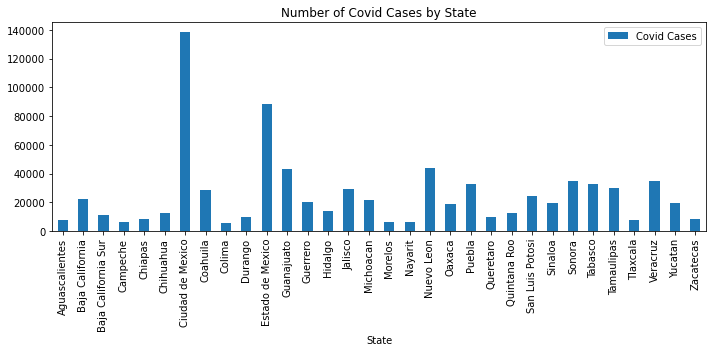

In [71]:
# Generate a bar plot showing the total number of Covid Cases by State
bar_data = pd.DataFrame(renamed_df.groupby(["State"]).sum()).reset_index()
bar_data
# #Barframe into two columns
bar_data = bar_data [["State", "Covid Cases"]]
bar_data = bar_data .set_index("State")

#Creating the bar chart
bar_data.plot(kind="bar", figsize=(10,5))

plt.title("Number of Covid Cases by State")
plt.tight_layout()
plt.savefig("images/Number of Covid Cases by State.png")
plt.show()


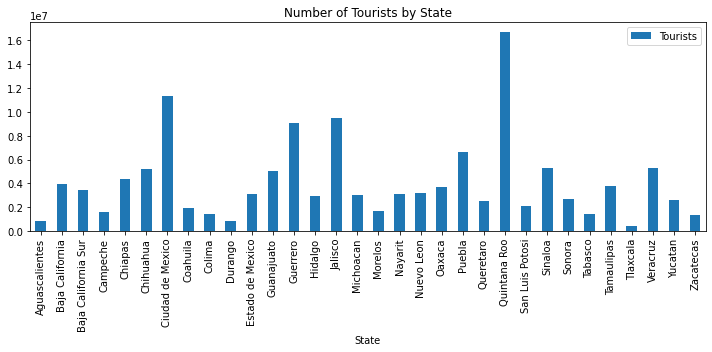

In [72]:
# Generate a bar plot showing the total number of tourists by State
bar_data = pd.DataFrame(renamed_df.groupby(["State"]).sum()).reset_index()
bar_data
# #Barframe into two columns
bar_data = bar_data [["State", "Tourists"]]
bar_data = bar_data .set_index("State")

#Creating the bar chart
bar_data.plot(kind="bar", figsize=(10,5))

plt.title("Number of Tourists by State")
plt.tight_layout()
plt.savefig("images/Number of Tourists by State.png")
plt.show()


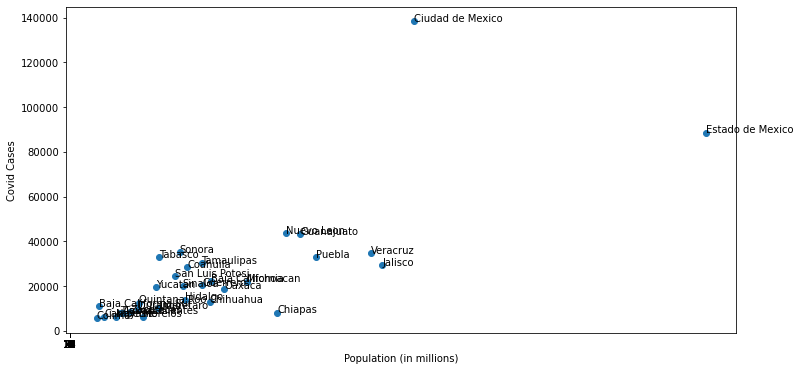

In [73]:

# Pull values for x and y values
fig, ax = plt.subplots(figsize=(12,6))
covid_cases = renamed_df["Covid Cases"]
population = renamed_df["Population"]
n = renamed_df["State"]
# Create Scatter Plot with values calculated above
ax.scatter(population,covid_cases)
for i,txt in enumerate(n):
    ax.annotate(txt,(population[i],covid_cases[i]))
ax.set_xticks(range(len(population)))
ax.set_xlabel("Population (in millions)")
ax.set_ylabel("Covid Cases")
# plt.xlim()
# plt.ylim(0, 50000)
plt.savefig("images/ScatterPlot of Covid and Population.png")
plt.show()

**Correlation and Regression**

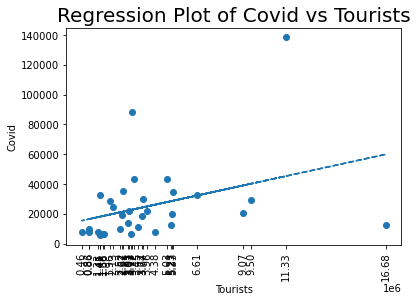

The correlation between Covid and Tourists 0.36
The r-squared is: 0.1296
y = 0.0x + 14135.69


In [87]:
# Calculate the correlation coefficient and linear regression model 
#Getting our x and y values
mean_covid = renamed_df.groupby(renamed_df["State"])["Covid Cases"].mean()
mean_tourists= renamed_df.groupby(renamed_df["State"])["Tourists"].mean()
mean_covidtrim= mean_covid.loc[mean_covid.index!="Quintana Roo"]
#independiente tourismo  ==> x
#dependiente  covid ==> y

#mean crime ->y
#mean tourists -> x
#Como el crimen impacta a turistas

#Performing the linear regression
slope, intercept, r, p, std_err = st.linregress(mean_tourists, mean_covid)
# Create equation of line to calculate our regression
fit = slope *mean_tourists + intercept
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot the linear model on top of scatter plot 
plt.scatter(mean_tourists,mean_covid)
plt.title('Regression Plot of Covid vs Tourists',fontsize =20)
plt.xlabel("Tourists")
plt.ylabel("Covid")
plt.plot(mean_tourists,fit,"--")
plt.xticks(mean_tourists, rotation=90)
plt.savefig("images/Regression Plot of Covid vs Tourists.png")
plt.show()

# Caculate correlation coefficient
corr = round(st.pearsonr(mean_covid,mean_tourists)[0],2)
print(f'The correlation between Covid and Tourists {corr}')
  
#calculate the R squared
print(f"The r-squared is: {corr**2}")

#Calculate the regression formula
print(equation)

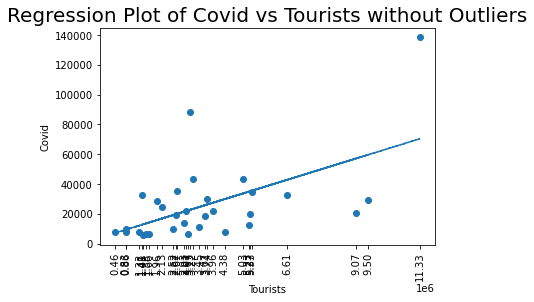

The correlation between Covid and Tourists 0.56
The r-squared is: 0.31360000000000005
y = 0.01x + 4468.68


In [88]:
# Calculate the correlation coefficient and linear regression model 
#Getting our x and y values
mean_covid = renamed_df.groupby(renamed_df["State"])["Covid Cases"].mean()
mean_tourists= renamed_df.groupby(renamed_df["State"])["Tourists"].mean()
mean_covidtrim= mean_covid.loc[mean_covid.index!="Quintana Roo"]
mean_touristtrim= mean_tourists.loc[mean_tourists.index!="Quintana Roo"]
#independiente tourismo  ==> x
#dependiente  covid ==> y



#Performing the linear regression
slope, intercept, r, p, std_err = st.linregress(mean_touristtrim, mean_covidtrim)
# Create equation of line to calculate our regression
fit = slope *mean_touristtrim + intercept
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot the linear model on top of scatter plot 
plt.scatter(mean_touristtrim,mean_covidtrim)
plt.title('Regression Plot of Covid vs Tourists without Outliers',fontsize =20)
plt.xlabel("Tourists")
plt.ylabel("Covid")
plt.plot(mean_touristtrim,fit,"--")
plt.xticks(mean_touristtrim, rotation=90)
plt.savefig("images/Regression Plot of Coviv vs Tourists without Outliers.png")
plt.show()

# Caculate correlation coefficient
corr = round(st.pearsonr(mean_covidtrim,mean_touristtrim)[0],2)
print(f'The correlation between Covid and Tourists {corr}')
  
#calculate the R squared
print(f"The r-squared is: {corr**2}")

#Calculate the regression formula
print(equation)

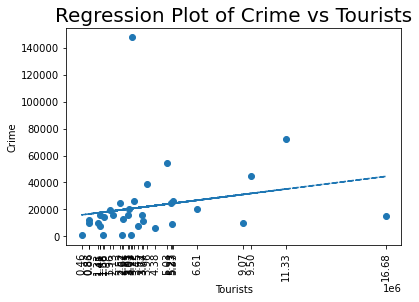

The correlation between Crime and Tourists 0.22
The r-squared is: 0.0484
y = 0.0x + 15096.34


In [89]:
# Calculate the correlation coefficient and linear regression model 
#Getting our x and y values
mean_crime= renamed_df.groupby(renamed_df["State"])["Crimes"].mean()
mean_tourists= renamed_df.groupby(renamed_df["State"])["Tourists"].mean()
mean_crimestrim= mean_covid.loc[mean_covid.index!="Quintana Roo"]

#mean crime ->y
#mean tourists -> x
#Como el crimen impacta a turistas

#Performing the linear regression
slope, intercept, r, p, std_err = st.linregress(mean_tourists, mean_crime)
# Create equation of line to calculate our regression
fit = slope *mean_tourists + intercept
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot the linear model on top of scatter plot 
plt.scatter(mean_tourists,mean_crime)
plt.title('Regression Plot of Crime vs Tourists',fontsize =20)
plt.xlabel("Tourists")
plt.ylabel("Crime")
plt.plot(mean_tourists,fit,"--")
plt.xticks(mean_tourists, rotation=90)
plt.savefig("images/Regression Plot of Crime vs Tourists.png")
plt.show()

# Calculate correlation coefficient
corr = round(st.pearsonr(mean_crime,mean_tourists)[0],2)
print(f'The correlation between Crime and Tourists {corr}')
  
#calculate the R squared
print(f"The r-squared is: {corr**2}")

#Calculate the regression formula
print(equation)

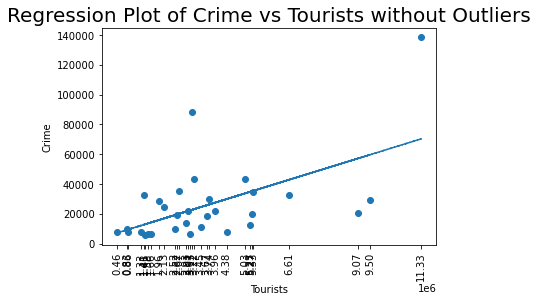

The correlation between Crime and Tourists 0.56
The r-squared is: 0.31360000000000005
y = 0.01x + 4468.68


In [77]:
# Calculate the correlation coefficient and linear regression model 
#Getting our x and y values
mean_crime = renamed_df.groupby(renamed_df["State"])["Crimes"].mean()
mean_tourists= renamed_df.groupby(renamed_df["State"])["Tourists"].mean()
mean_crimetrim= mean_covid.loc[mean_crime.index!="Quintana Roo"]
mean_touristtrim= mean_tourists.loc[mean_tourists.index!="Quintana Roo"]
#independiente tourismo  ==> x
#dependiente  covid ==> y

#Entre mayor turismo, mayores crimenes

#Performing the linear regression
slope, intercept, r, p, std_err = st.linregress(mean_touristtrim, mean_crimetrim)
# Create equation of line to calculate our regression
fit = slope *mean_touristtrim + intercept
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot the linear model on top of scatter plot 
plt.scatter(mean_touristtrim,mean_crimetrim)
plt.title('Regression Plot of Crime vs Tourists without Outliers',fontsize =20)
plt.xlabel("Tourists")
plt.ylabel("Crime")
plt.plot(mean_touristtrim,fit,"--")
plt.xticks(mean_touristtrim, rotation=90)
plt.savefig("images/Regression Plot of Crime vs Tourists without Outliers.png")
plt.show()

# Caculate correlation coefficient
corr = round(st.pearsonr(mean_crimetrim,mean_touristtrim)[0],2)
print(f'The correlation between Crime and Tourists {corr}')
  
#calculate the R squared
print(f"The r-squared is: {corr**2}")

#Calculate the regression formula
print(equation)

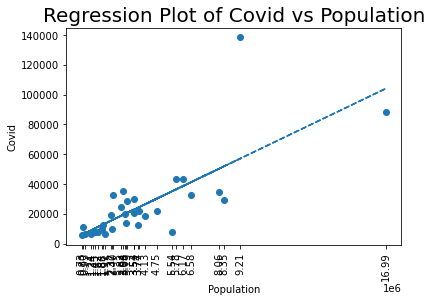

The correlation between Covid and Population 0.75
The r-squared is: 0.5625
y = 0.01x + 1523.15


In [78]:
# Calculate the correlation coefficient and linear regression model 
#Getting our x and y values
mean_covid = renamed_df.groupby(renamed_df["State"])["Covid Cases"].mean()
mean_population= renamed_df.groupby(renamed_df["State"])["Population"].mean()
mean_covidtrim= mean_covid.loc[mean_covid.index!="Quintana Roo"]
#independiente population  ==> x
#dependiente  covid ==> y

#mean crime ->y
#mean tourists -> x
#Entre mayor poblacion, mayor COVID

#Performing the linear regression
slope, intercept, r, p, std_err = st.linregress(mean_population, mean_covid)
# Create equation of line to calculate our regression
fit = slope *mean_population + intercept
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot the linear model on top of scatter plot 
plt.scatter(mean_population,mean_covid)
plt.title('Regression Plot of Covid vs Population',fontsize =20)
plt.xlabel("Population")
plt.ylabel("Covid")
plt.plot(mean_population,fit,"--")
plt.xticks(mean_population, rotation=90)
plt.savefig("images/Regression Plot of Covid vs Population.png")
plt.show()

# Caculate correlation coefficient
corr = round(st.pearsonr(mean_covid,mean_population)[0],2)
print(f'The correlation between Covid and Population {corr}')
  
#calculate the R squared
print(f"The r-squared is: {corr**2}")

#Calculate the regression formula
print(equation)

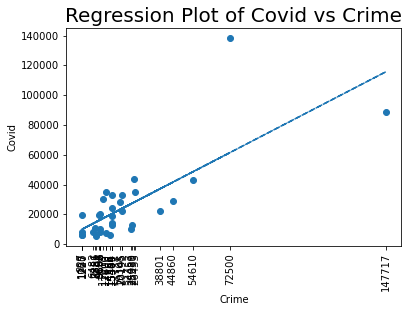

The correlation between Covid and Crime 0.76
The r-squared is: 0.5776
y = 0.72x + 9255.85


In [79]:
# Calculate the correlation coefficient and linear regression model 
#Getting our x and y values
mean_covid = renamed_df.groupby(renamed_df["State"])["Covid Cases"].mean()
mean_crime= renamed_df.groupby(renamed_df["State"])["Crimes"].mean()

#independiente crime  ==> x
#dependiente  covid ==> y

#Entre mayor crimen, mayor covid

#Performing the linear regression
slope, intercept, r, p, std_err = st.linregress(mean_crime, mean_covid)
# Create equation of line to calculate our regression
fit = slope *mean_crime + intercept
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot the linear model on top of scatter plot 
plt.scatter(mean_crime,mean_covid)
plt.title('Regression Plot of Covid vs Crime',fontsize =20)
plt.xlabel("Crime")
plt.ylabel("Covid")
plt.plot(mean_crime,fit,"--")
plt.xticks(mean_crime, rotation=90)
plt.savefig("images/Regression Plot of Covid vs Crime.png")
plt.show()

# Caculate correlation coefficient
corr = round(st.pearsonr(mean_covid,mean_crime)[0],2)
print(f'The correlation between Covid and Crime {corr}')
  
#calculate the R squared
print(f"The r-squared is: {corr**2}")

#Calculate the regression formula
print(equation)

In [80]:
## Covid Rate Heat Map

In [86]:
df=pd.read_csv('clean_data/covid_a.csv', encoding = "ISO-8859-1")
repo_url = 'https://raw.githubusercontent.com/angelnmara/geojson/master/mexicoHigh.json' #Archivo GeoJSON
mx_regions_geo = requests.get(repo_url).json()
fig = px.choropleth(data_frame=df,
                    geojson=mx_regions_geo,
                    locations='State', # nombre de la columna del Dataframe
                    featureidkey='properties.name',  # ruta al campo del archivo GeoJSON con el que se hará la relación (nombre de los estados)
                    color="Rate" , #El color depende de las cantidades
                    color_continuous_scale="burg", #greens
                    #scope="north america"
                   )
fig.update_geos(showcountries=True, showcoastlines=True, showland=True, fitbounds="locations")
fig.update_layout(
    title_text = 'Covid confirmed cases rate (%) in Mexico',
    font=dict(
        #family="Courier New, monospace",
        family="Ubuntu",
        size=18,
        color="#7F7F7F"
    ),
)
# plt.savefig("images/Covid confirmed cases rate in Mexico.png")
fig.show()



In [82]:
df=pd.read_csv('clean_data/crimenes_a.csv', encoding = "ISO-8859-1")
repo_url = 'https://raw.githubusercontent.com/angelnmara/geojson/master/mexicoHigh.json' #Archivo GeoJSON
mx_regions_geo = requests.get(repo_url).json()
fig = px.choropleth(data_frame=df,
                    geojson=mx_regions_geo,
                    locations='State', # nombre de la columna del Dataframe
                    featureidkey='properties.name',  # ruta al campo del archivo GeoJSON con el que se hará la relación (nombre de los estados)
                    color="Rate" , #El color depende de las cantidades
                    color_continuous_scale='Blues', #blue
                    #scope="north america"
                   )
fig.update_geos(showcountries=True, showcoastlines=True, showland=True, fitbounds="locations")
fig.update_layout(
    title_text = 'Crime rate (%) in Mexico',
    font=dict(
        #family="Courier New, monospace",
        family="Ubuntu",
        size=18,
        color="#7F7F7F"
    ),
)
#plt.savefig("images/Crime rate in Mexico.png")
fig.show()



<Figure size 432x288 with 0 Axes>

In [84]:
df=pd.read_csv('clean_data/Combined_rates.csv', encoding = "ISO-8859-1")
repo_url = 'https://raw.githubusercontent.com/angelnmara/geojson/master/mexicoHigh.json' #Archivo GeoJSON
mx_regions_geo = requests.get(repo_url).json()
fig = px.choropleth(data_frame=df,
                    geojson=mx_regions_geo,
                    locations='State', # nombre de la columna del Dataframe
                    featureidkey='properties.name',  # ruta al campo del archivo GeoJSON con el que se hará la relación (nombre de los estados)
                    color="Rate" , #El color depende de las cantidades
                    color_continuous_scale='twilight', #blue
                    #scope="north america"
                   )
fig.update_geos(showcountries=True, showcoastlines=True, showland=True, fitbounds="locations")
fig.update_layout(
    title_text = 'Safe Travel Locations Mexico Heatmap',
    font=dict(
        #family="Courier New, monospace",
        family="Ubuntu",
        size=18,
        color="#7F7F7F"
    ),
)
# plt.savefig("images/Safe Travel Locations Mexico Heatmap.png")
fig.show()



<Figure size 432x288 with 0 Axes>

In [ ]:
## Best places to invest in Safe Tourism are Baja California Sur, Campeche, Yucatán and Chiapas.